In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [62]:
hd=pd.read_csv('heart.csv')

In [64]:
hd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [65]:
hd.shape

(1025, 14)

In [66]:
hd.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [67]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [68]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
#statistical measures about the data
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [76]:
#checking the distribution of num column
hd['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

1--->DEFECTIVE HEART
0--->HEALTHY HEART

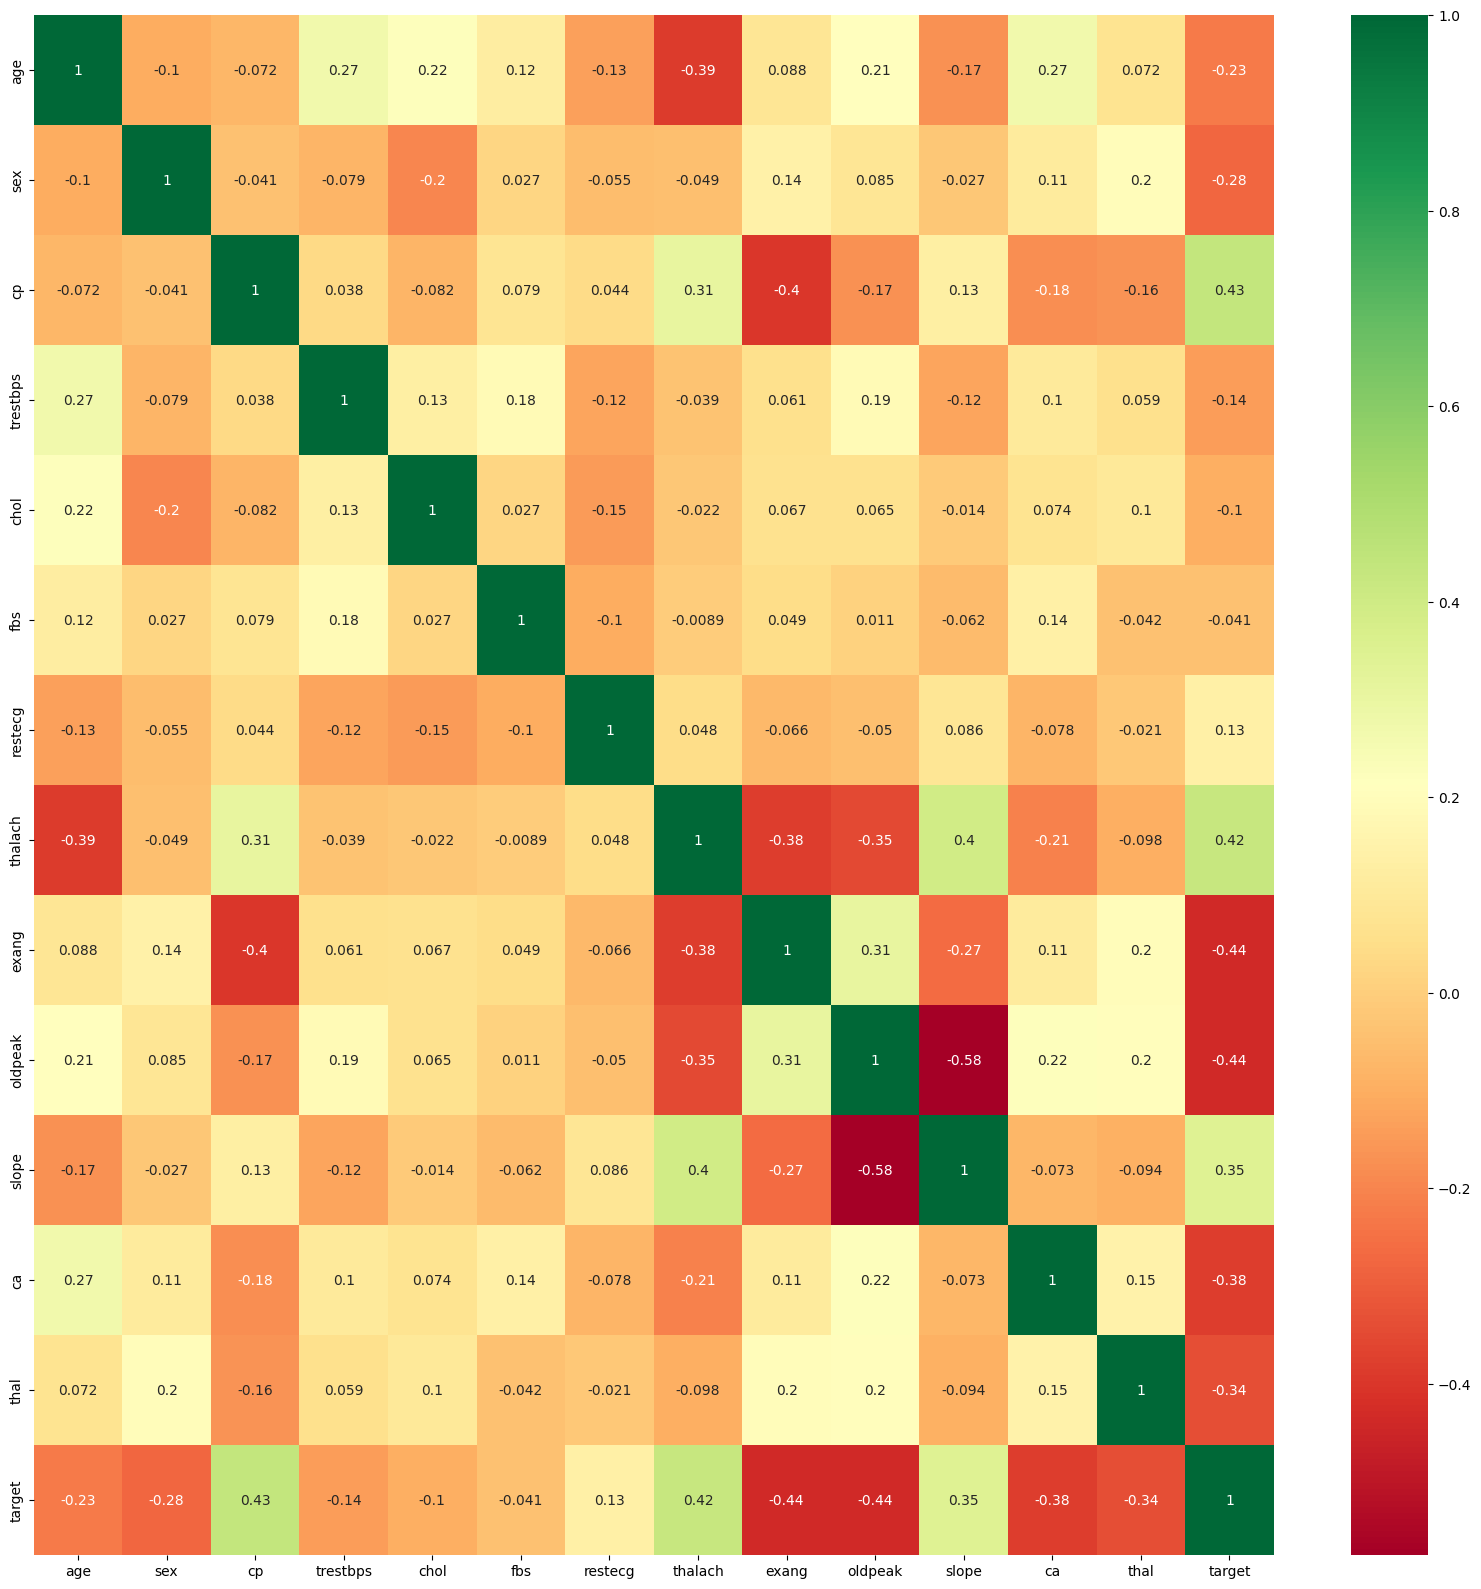

In [77]:
import seaborn as sns
#get correct correlation of each features in dataset
corrmat=hd.corr()
top_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(hd[top_features].corr(),annot=True,cmap='RdYlGn')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

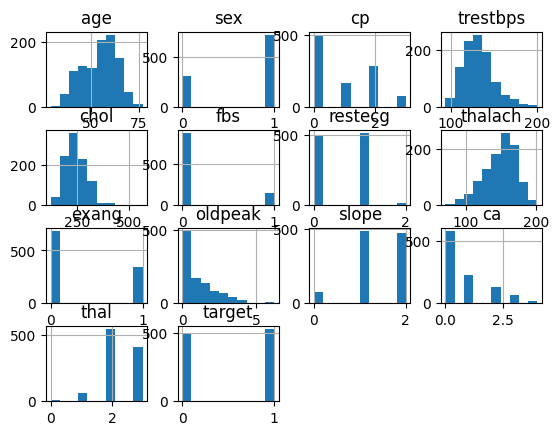

In [78]:
hd.hist()

Splitting the features and target

In [71]:
X=hd.drop(columns='target',axis=1)
Y=hd['target']

In [72]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [73]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the data into training data and testing data

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


MODEL TRAINING

LOGISTIC REGRESSION

In [16]:
model_lg=LogisticRegression(solver='lbfgs', max_iter=10000)

In [17]:
#training the LogisticRegression model with training data
model_lg.fit(X_train.values,Y_train)

LogisticRegression(max_iter=10000)

MODEL EVALUATION

ACCURACY SCORE

In [18]:
#accuracy on training data
X_train_prediction_lg=model_lg.predict(X_train.values)
training_accuracy_lg=accuracy_score(X_train_prediction_lg,Y_train)

In [19]:
print('Accuracy on training data for logistic regression: ',training_accuracy_lg)

Accuracy on training data for logistic regression:  0.8585365853658536


In [20]:
#accuracy on test data
X_test_prediction_lg=model_lg.predict(X_test.values)
test_accuracy_lg=accuracy_score(X_test_prediction_lg,Y_test)

In [21]:
print('Accuracy on test data for logistic regression: ',test_accuracy_lg)

Accuracy on test data for logistic regression:  0.8146341463414634


In [22]:
print("Classification Report[For Training Data]:\n", classification_report(X_train_prediction_lg,Y_train))

Classification Report[For Training Data]:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       363
           1       0.90      0.83      0.87       457

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820



In [23]:
print("Confusion Matrix[For Training Data]:\n", confusion_matrix(X_train_prediction_lg, Y_train))

Confusion Matrix[For Training Data]:
 [[323  40]
 [ 76 381]]


In [24]:
print("Classification Report[For Test Data]:\n", classification_report(X_test_prediction_lg,Y_test))

Classification Report[For Test Data]:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        88
           1       0.88      0.79      0.83       117

    accuracy                           0.81       205
   macro avg       0.81      0.82      0.81       205
weighted avg       0.82      0.81      0.82       205



In [25]:
print("Confusion Matrix[For Test Data]:\n", confusion_matrix(X_test_prediction_lg, Y_test))

Confusion Matrix[For Test Data]:
 [[75 13]
 [25 92]]


ADA BOOST

In [26]:
model_ada=AdaBoostClassifier(algorithm='SAMME', n_estimators=10000)

In [27]:
#training the ADA Boost model with training data
model_ada.fit(X_train.values,Y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=10000)

MODEL EVALUATION [ADA BOOST]

ACCURACY SCORE

In [28]:
#accuracy on training data
X_train_prediction_ada=model_ada.predict(X_train.values)
training_accuracy_ada=accuracy_score(X_train_prediction_ada,Y_train)

In [29]:
print('Accuracy on training data for ADA Boost: ',training_accuracy_ada)

Accuracy on training data for ADA Boost:  1.0


In [30]:
#accuracy on test data
X_test_prediction_ada=model_ada.predict(X_test.values)
test_accuracy_ada=accuracy_score(X_test_prediction_ada,Y_test)

In [31]:
print('Accuracy on test data for ADA Boost: ',test_accuracy_ada)

Accuracy on test data for ADA Boost:  1.0


In [32]:
print("Classification Report[For Training Data]:\n", classification_report(X_train_prediction_ada,Y_train))

Classification Report[For Training Data]:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [33]:
print("Confusion Matrix[For Training Data]:\n", confusion_matrix(X_train_prediction_ada, Y_train))

Confusion Matrix[For Training Data]:
 [[399   0]
 [  0 421]]


In [34]:
print("Classification Report[For Test Data]:\n", classification_report(X_test_prediction_ada,Y_test))

Classification Report[For Test Data]:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
print("Confusion Matrix[For Test Data]:\n", confusion_matrix(X_test_prediction_ada, Y_test))

XG BOOST

In [36]:
model_xg = xgb.XGBClassifier(n_estimators=10000)

In [37]:
#training the xg Boost model with training data
model_xg.fit(X_train.values,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

MODEL EVALUATION [XG BOOST]

ACCURACY SCORE

In [38]:
#accuracy on training data
X_train_prediction_xg=model_ada.predict(X_train.values)
training_accuracy_xg=accuracy_score(X_train_prediction_xg,Y_train)

In [39]:
print('Accuracy on training data for XG Boost: ',training_accuracy_xg)

Accuracy on training data for XG Boost:  1.0


In [40]:
#accuracy on test data
X_test_prediction_xg=model_xg.predict(X_test.values)
test_accuracy_xg=accuracy_score(X_test_prediction_xg,Y_test)

In [41]:
print('Accuracy on test data for XG Boost: ',test_accuracy_xg)

Accuracy on test data for XG Boost:  1.0


In [42]:
print("Classification Report[For Training Data]:\n", classification_report(X_train_prediction_xg,Y_train))

Classification Report[For Training Data]:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [43]:
print("Confusion Matrix[For train Data]:\n", confusion_matrix(X_train_prediction_xg, Y_train))

Confusion Matrix[For train Data]:
 [[399   0]
 [  0 421]]


In [44]:
print("Classification Report[For Test Data]:\n", classification_report(X_test_prediction_xg,Y_test))

Classification Report[For Test Data]:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [45]:
print("Confusion Matrix[For test Data]:\n", confusion_matrix(X_test_prediction_xg, Y_test))

Confusion Matrix[For test Data]:
 [[100   0]
 [  0 105]]


Building a Predictive System:

In [46]:
input_data=(52,1,0,125,212,0,1,168,0,1,2,2,3)
#change the input_data into munpy
input_data_as_numpy=np.asarray(input_data)
#reshaping the numpy array as we are predicting for only one instance
input_reshape=input_data_as_numpy.reshape(1,-1)

FOR LOGISTIC REGRESSION

In [47]:
prediction=model_lg.predict(input_reshape)
print(prediction)

if (prediction[0]==0):
    print("The person does not have a heart disease")
else:
    print("This person has a heart disease")

[0]
The person does not have a heart disease


FOR ADA BOOST

In [48]:
prediction1=model_ada.predict(input_reshape)
print(prediction1)

if (prediction1[0]==0):
    print("The person does not have a heart disease")
else:
    print("This person has a heart disease")

[0]
The person does not have a heart disease


FOR XG BOOST

In [49]:
prediction2=model_xg.predict(input_reshape)
print(prediction2)

if (prediction2[0]==0):
    print("The person does not have a heart disease")
else:
    print("This person has a heart disease")

[0]
The person does not have a heart disease


Compare the Accuracy

In [ ]:
data1 = {'ID': [1, 2, 3], 'Name of Model ': ['Logistic Regression', 'ADA Boost', 'XG Boost'],
         'Train_Accuracy ':[training_accuracy_lg,training_accuracy_ada,training_accuracy_xg],
         'Test_Accuracy ':[test_accuracy_lg, test_accuracy_ada, test_accuracy_xg]}
df1=pd.DataFrame(data1)
df1

,ID,Name of Model,Train_Accuracy,Test_Accuracy
0,1,Logistic Regression,0.858537,0.814634
1,2,ADA Boost,1.000000,1.000000
2,3,XG Boost,1.000000,1.000000


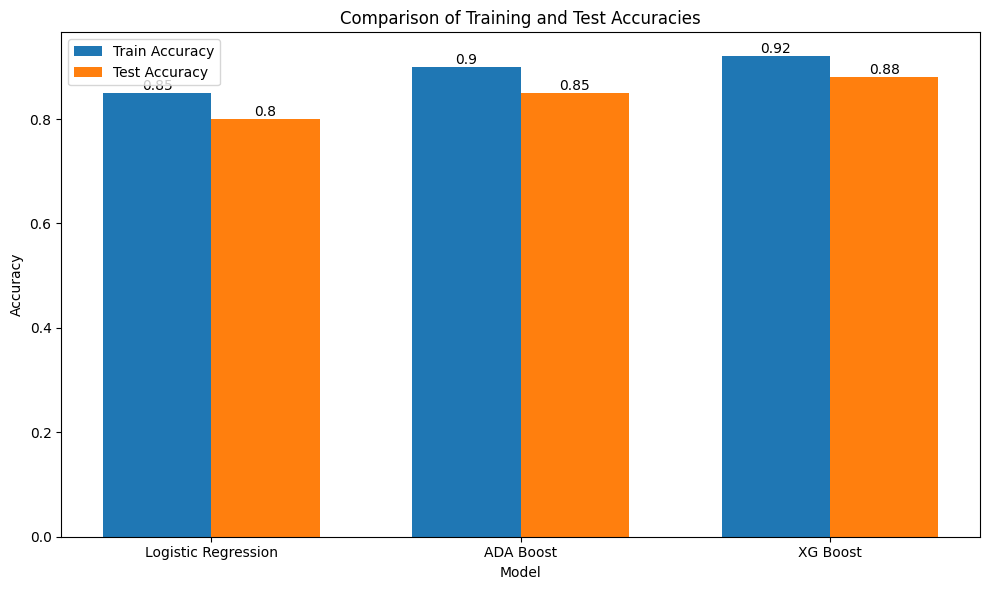

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your accuracy values
training_accuracy_lg = 0.85
test_accuracy_lg = 0.80
training_accuracy_ada = 0.90
test_accuracy_ada = 0.85
training_accuracy_xg = 0.92
test_accuracy_xg = 0.88

# Data
data1 = {'ID': [1, 2, 3], 
         'Name of Model ': ['Logistic Regression', 'ADA Boost', 'XG Boost'],
         'Train_Accuracy ': [training_accuracy_lg, training_accuracy_ada, training_accuracy_xg],
         'Test_Accuracy ': [test_accuracy_lg, test_accuracy_ada, test_accuracy_xg]}

# Create DataFrame
df1 = pd.DataFrame(data1)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars
index = df1.index

# Plot the bars
train_bars = ax.bar(index, df1['Train_Accuracy '], bar_width, label='Train Accuracy')
test_bars = ax.bar(index + bar_width, df1['Test_Accuracy '], bar_width, label='Test Accuracy')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df1['Name of Model '])
ax.legend()

# Add accuracy labels on top of the bars
for bar in train_bars + test_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


SAVING THE TRAINING MODEL

In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(model_lg, open(filename, 'wb'))
pickle.dump(model_ada, open(filename, 'wb'))
pickle.dump(model_xg, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
